In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from utils.helpers import *
from utils.preprocessing import *
from impl.implementations import *
import datetime
from utils.plots import *
from utils.cross_validation import *
%load_ext autoreload
%autoreload 2

In [2]:
y_train, tx_train, ids_train = load_csv_data('data/train.csv')
y_train.shape = (-1, 1)
y_test, tx_test, ids_test = load_csv_data('data/test.csv')
y_test.shape = (-1, 1)

In [3]:
#tx_train, tx_test = nan_to_mean(tx_train, tx_test)

In [4]:
x_train_sep, y_train_sep, ids_train_sep, indx_train_sep = split_data_by_DER_mass_MMC(tx_train, y_train, ids_train)
x_test_sep, y_test_sep, ids_test_sep, indx_test_sep = split_data_by_DER_mass_MMC(tx_test, y_test, ids_test)

In [5]:
for i in range(8):
    x_train_sep[i], x_test_sep[i] = nan_to_mean(x_train_sep[i], x_test_sep[i])

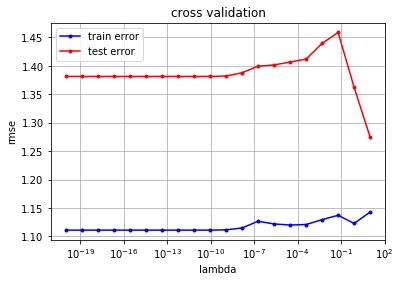

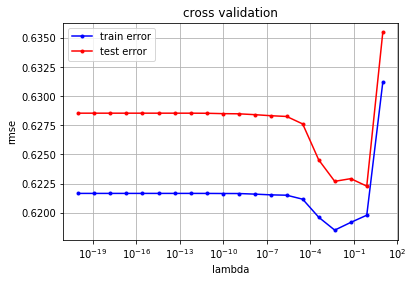

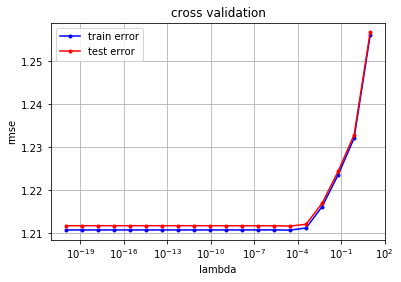

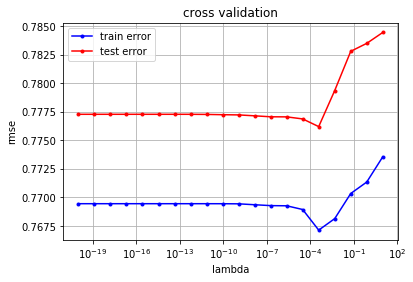

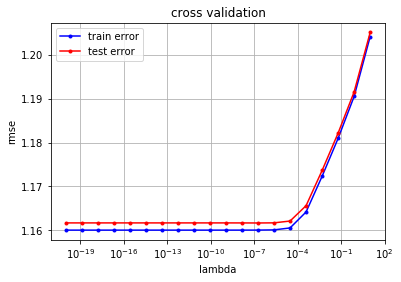

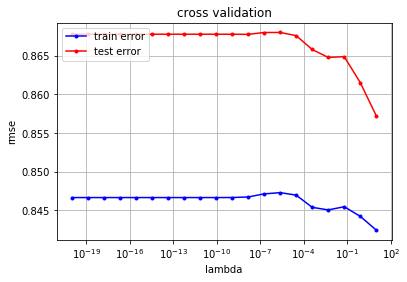

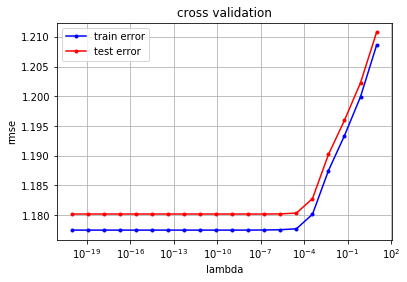

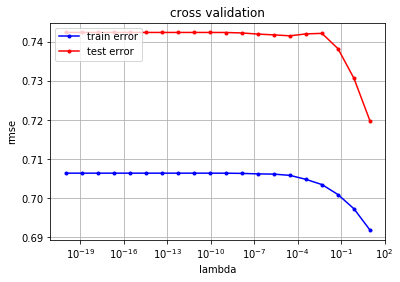

[10.0, 0.7847599703514623, 2.9763514416313253e-05, 0.00037926901907322694, 1.8329807108324375e-07, 10.0, 1.8329807108324375e-07, 10.0]
0.8514397098708073
[0.7774856574964991, 0.9460694231750895, 0.7561334984598774, 0.9159905937683716, 0.7948919818173298, 0.9010169491525423, 0.7851601117558563, 0.9347694633408918]
0.8493210670042666
[0.7770158558070199, 0.9459035222052069, 0.7552872249214062, 0.9148148148148149, 0.7939266132433571, 0.8979661016949153, 0.7831237911025145, 0.926530612244898]


In [4]:
number_of_models = 8

best_lambdas = []
acc_train = []
acc_test = []
for i in range(number_of_models):
    x_tr = x_train_sep[i]
    y_tr = y_train_sep[i]
    lambdas = np.logspace(-20, 1, 20)
    lambda_, acc_tr, acc_te = cross_validation(x_tr, y_tr, lambdas, poly_degree=3, norm=None)
    best_lambdas.append(lambda_)
    acc_train.append(acc_tr)
    acc_test.append(acc_te)
    
print(best_lambdas)
print(np.mean(acc_train))
print(acc_train)
print(np.mean(acc_test))
print(acc_test)

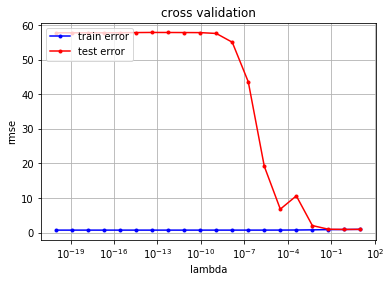

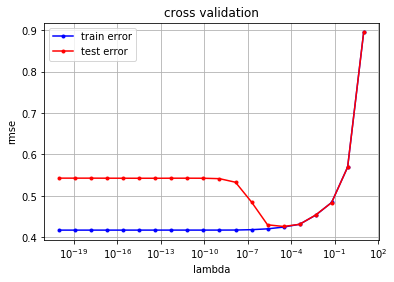

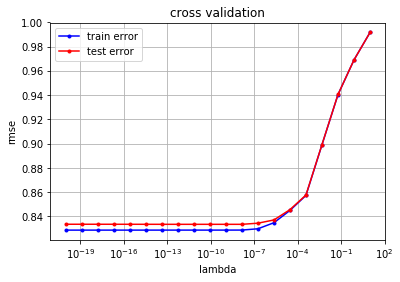

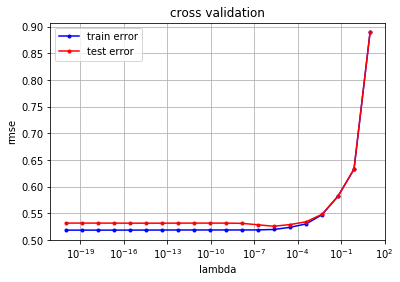

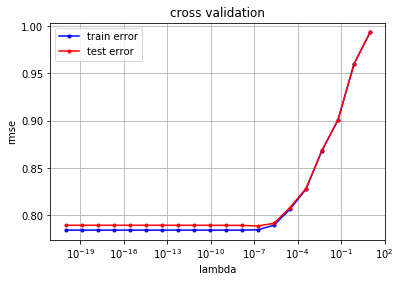

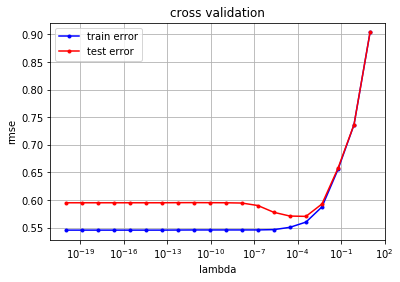

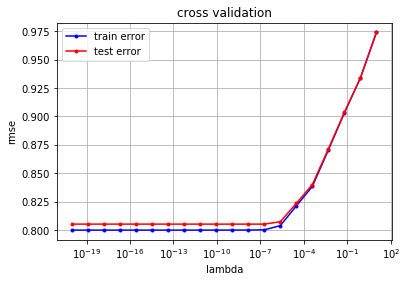

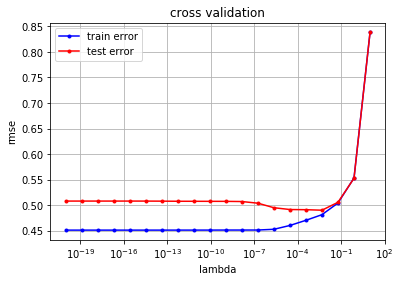

[0.7847599703514623, 2.9763514416313253e-05, 1.438449888287666e-08, 2.335721469090131e-06, 1.8329807108324375e-07, 0.00037926901907322694, 8.858667904100832e-11, 0.004832930238571772]
0.837741249691367
[0.67566065862583, 0.9446826612217116, 0.75641453113588, 0.9155496766607877, 0.7943085430432542, 0.8998116760828625, 0.7851923490221362, 0.9303099017384732]
0.8368455174632525
[0.67566065862583, 0.9446018376722819, 0.7556301800514433, 0.9149470899470898, 0.7934837621256854, 0.8972881355932204, 0.783220502901354, 0.9299319727891158]


In [21]:
number_of_models = 8

best_lambdas = []
acc_train = []
acc_test = []
for i in range(number_of_models):
    x_tr = x_train_sep[i]
    y_tr = y_train_sep[i]
    lambdas = np.logspace(-20, 1, 20)
    lambda_, acc_tr, acc_te = cross_validation(x_tr, y_tr, lambdas, poly_degree=3, norm="min_max")
    best_lambdas.append(lambda_)
    acc_train.append(acc_tr)
    acc_test.append(acc_te)
    
print(best_lambdas)
print(np.mean(acc_train))
print(acc_train)
print(np.mean(acc_test))
print(acc_test)

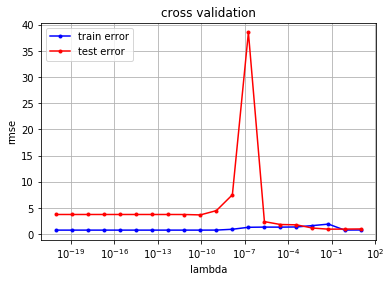

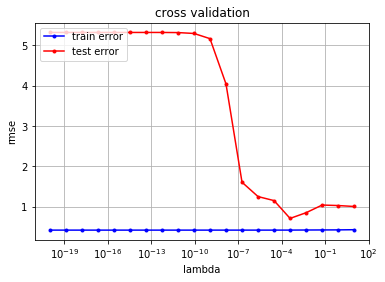

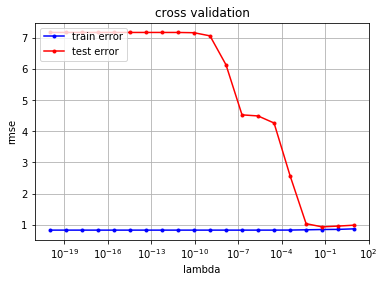

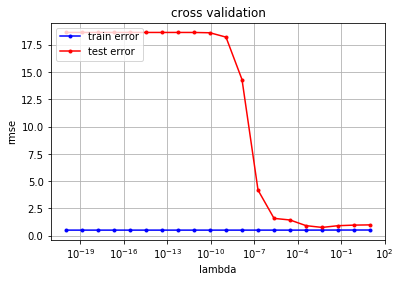

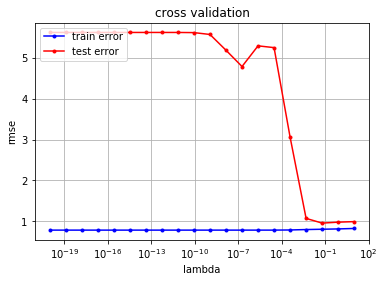

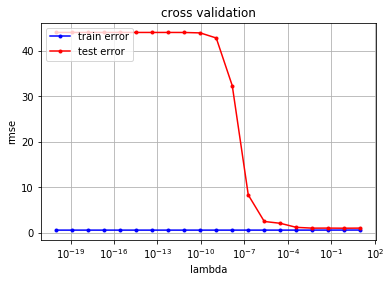

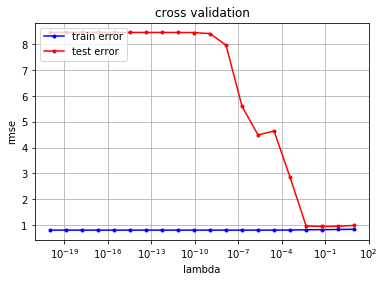

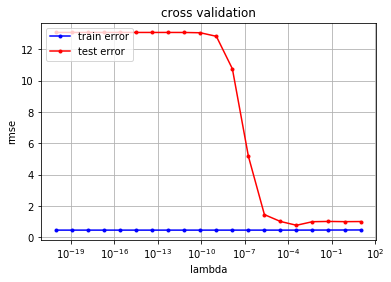

[0.061584821106602794, 0.00037926901907322694, 0.061584821106602794, 0.004832930238571772, 0.061584821106602794, 0.7847599703514623, 0.061584821106602794, 0.00037926901907322694]
0.8448303981509249
[0.7846094773456205, 0.9464650331801939, 0.7337413864278682, 0.9152851263962376, 0.7751792492619148, 0.9031261770244822, 0.763502041693531, 0.936734693877551]
0.7600431400360371
[0.6678682748339884, 0.9399310872894333, 0.6587453558159474, 0.9056878306878307, 0.6198228595529314, 0.7871186440677966, 0.6589941972920697, 0.8421768707482993]


In [22]:
number_of_models = 8

best_lambdas = []
acc_train = []
acc_test = []
for i in range(number_of_models):
    x_tr = x_train_sep[i]
    y_tr = y_train_sep[i]
    lambdas = np.logspace(-20, 1, 20)
    lambda_, acc_tr, acc_te = cross_validation(x_tr, y_tr, lambdas, poly_degree=3, norm="std")
    best_lambdas.append(lambda_)
    acc_train.append(acc_tr)
    acc_test.append(acc_te)
    
print(best_lambdas)
print(np.mean(acc_train))
print(acc_train)
print(np.mean(acc_test))
print(acc_test)

In [23]:
best_lambdas = [10.0, 0.7847599703514623, 2.9763514416313253e-05, 1.128837891684693e-09, 2.9763514416313253e-05, 0.00037926901907322694, 1.8329807108324375e-07, 10.0]

In [24]:
pred = train_and_get_predictions(x_train_sep, y_train_sep, x_test_sep, y_test_sep, indx_test_sep, best_lambdas)

[0.7632606044179429, 0.9401676683382459, 0.6732445485982109, 0.9100766992859032, 0.7181563244565332, 0.893970189701897, 0.7114613042007057, 0.9309410968178741]
0.8176598044771641


In [25]:
create_csv_submission(ids_test, pred, "output6.csv")

NEW LAMBDA: 1


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/matplotlib/axes/_base.py:3012: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  self.set_xlim(upper, lower, auto=None)


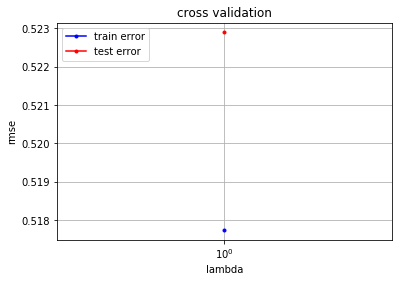

NEW LAMBDA: 1


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/matplotlib/axes/_base.py:3012: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  self.set_xlim(upper, lower, auto=None)


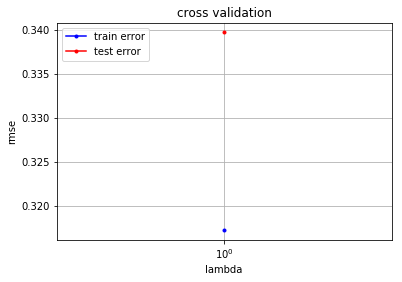

NEW LAMBDA: 1


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/matplotlib/axes/_base.py:3012: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  self.set_xlim(upper, lower, auto=None)


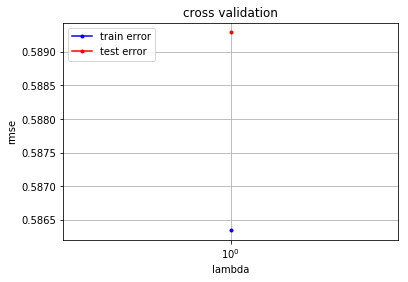

NEW LAMBDA: 1


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/matplotlib/axes/_base.py:3012: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  self.set_xlim(upper, lower, auto=None)


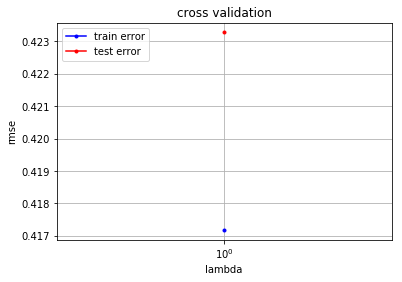

NEW LAMBDA: 1


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/matplotlib/axes/_base.py:3012: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  self.set_xlim(upper, lower, auto=None)


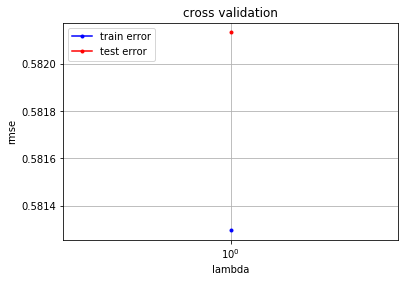

NEW LAMBDA: 1


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/matplotlib/axes/_base.py:3012: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  self.set_xlim(upper, lower, auto=None)


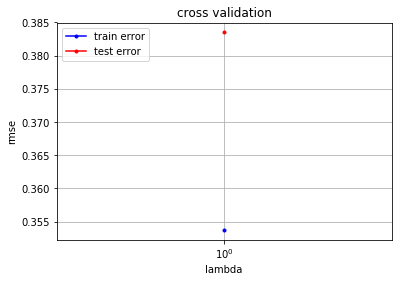

NEW LAMBDA: 1


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/matplotlib/axes/_base.py:3012: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  self.set_xlim(upper, lower, auto=None)


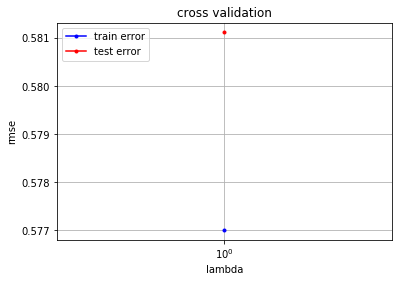

NEW LAMBDA: 1


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/matplotlib/axes/_base.py:3012: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  self.set_xlim(upper, lower, auto=None)


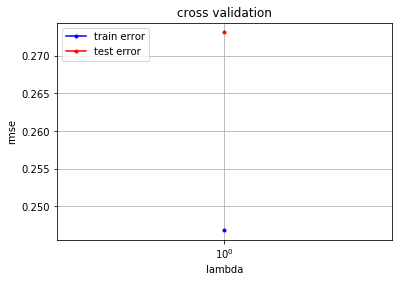

[1, 1, 1, 1, 1, 1, 1, 1]
0.8142390531531174
[0.774132297360377, 0.9433979921728772, 0.6779222635038583, 0.9085390946502058, 0.6893012793476732, 0.8811299435028248, 0.7063829787234043, 0.9331065759637187]
0.8132645574968234
[0.7731264398970049, 0.9430704441041348, 0.6777364961417548, 0.9092592592592592, 0.6889708983551245, 0.8783050847457627, 0.7036750483558994, 0.9319727891156464]


In [86]:
number_of_models = 8

best_lambdas = []
acc_train = []
acc_test = []
for i in range(number_of_models):
    x_tr = x_train_sep[i]
    y_tr = y_train_sep[i]

    #lambdas = np.logspace(-5, 1, 5)
    #lambdas = [0.0001, 0.001, 0.01, 0.1, 1]
    lambdas = [1]
    lambda_, acc_tr, acc_te = cross_validation(x_tr, y_tr, lambdas, poly_degree=3, norm=None, method="SKL")
    best_lambdas.append(lambda_)
    acc_train.append(acc_tr)
    acc_test.append(acc_te)
    
print(best_lambdas)
print(np.mean(acc_train))
print(acc_train)
print(np.mean(acc_test))
print(acc_test)

In [77]:
number_of_models = 8

best_lambdas = []
acc_train = []
acc_test = []
for i in range(number_of_models):
    x_tr = x_train_sep[i]
    y_tr = y_train_sep[i]

    #lambdas = np.logspace(-5, 1, 5)
    #lambdas = [0.0001, 0.001, 0.01, 0.1, 1]
    lambdas = [1]
    lambda_, acc_tr, acc_te = cross_validation(x_tr, y_tr, lambdas, poly_degree=3, norm="std", method="SKL")
    best_lambdas.append(lambda_)
    acc_train.append(acc_tr)
    acc_test.append(acc_te)
    
print(best_lambdas)
print(np.mean(acc_train))
print(acc_train)
print(np.mean(acc_test))
print(acc_test)

NEW LAMBDA: 1


/home/blagojce/.conda/envs/ml_epfl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


KeyboardInterrupt: 

In [116]:
number_of_models = 8

best_lambdas = []
acc_train = []
acc_test = []
for i in range(number_of_models):
    x_tr = x_train_sep[i]
    y_tr = y_train_sep[i]

    #lambdas = np.logspace(-5, 1, 5)
    lambdas = [0.0000001]
    #lambdas = [1]
    lambda_, acc_tr, acc_te = cross_validation(x_tr, y_tr, lambdas, poly_degree=3, norm="std", method="logistic")
    best_lambdas.append(lambda_)
    acc_train.append(acc_tr)
    acc_test.append(acc_te)
    
print(best_lambdas)
print(np.mean(acc_train))
print(acc_train)
print(np.mean(acc_test))
print(acc_test)

NEW LAMBDA: 1e-06
Itteration: 0, Loss: 26.85749550524179
Itteration: 5, Loss: 14.258431232718756
Itteration: 10, Loss: 8.481417477186472
Itteration: 15, Loss: 6.201503982615137
Itteration: 20, Loss: 4.567450883864388
Itteration: 25, Loss: 3.4776616321675737
Itteration: 30, Loss: 2.729674916598081
Itteration: 35, Loss: 2.2278373633325406
Itteration: 40, Loss: 1.8845863743363225
Itteration: 45, Loss: 1.6469317316229073
Itteration: 50, Loss: 6.2776853727535
Itteration: 55, Loss: 5.7117677161240605
Itteration: 60, Loss: 5.3049688249333595
Itteration: 65, Loss: 4.953507107594336
Itteration: 70, Loss: 4.641782609641402
Itteration: 75, Loss: 4.3546463819920165
Itteration: 80, Loss: 4.086854065218779
Itteration: 85, Loss: 3.8357141079840438
Itteration: 90, Loss: 3.6006473188993016
Itteration: 95, Loss: 3.379928860309439
Itteration: 100, Loss: 3.172556370549603
Itteration: 105, Loss: 2.977123242857716
Itteration: 110, Loss: 2.7930963680758922
Itteration: 115, Loss: 2.6200736668806264
Itteration

Itteration: 980, Loss: 0.4348622106360971
Itteration: 985, Loss: 0.43613242299101285
Itteration: 990, Loss: 0.43570245356807796
Itteration: 995, Loss: 0.4382234909076453
Itteration: 1000, Loss: 0.4383689607480092
Itteration: 1005, Loss: 0.4352996732259612
Itteration: 1010, Loss: 0.43512179361944725
Itteration: 1015, Loss: 0.43409734520086396
Itteration: 1020, Loss: 0.4447950514019914
Itteration: 1025, Loss: 0.43940366728979047
Itteration: 1030, Loss: 0.43406205711462026
Itteration: 1035, Loss: 0.44177038775616706
Itteration: 1040, Loss: 0.43371561884501775
Itteration: 1045, Loss: 0.4750536631261823
Itteration: 1050, Loss: 0.4859289438468737
Itteration: 1055, Loss: 0.4369154768993124
Itteration: 1060, Loss: 0.43940787145791216
Itteration: 1065, Loss: 0.4523198805793109
Itteration: 1070, Loss: 0.43311631314976995
Itteration: 1075, Loss: 0.45660825430051133
Itteration: 1080, Loss: 0.4536159838589723
Itteration: 1085, Loss: 0.43299000794445225
Itteration: 1090, Loss: 0.4769725398771109
Itt

Itteration: 1935, Loss: 0.4542043898529327
Itteration: 1940, Loss: 0.4575920253728857
Itteration: 1945, Loss: 0.4555193382099798
Itteration: 1950, Loss: 0.45263726187470904
Itteration: 1955, Loss: 0.46249804458864013
Itteration: 1960, Loss: 0.452455944945314
Itteration: 1965, Loss: 0.45371660220891463
Itteration: 1970, Loss: 0.45062895329425634
Itteration: 1975, Loss: 0.4546443645343595
Itteration: 1980, Loss: 0.45680672375873277
Itteration: 1985, Loss: 0.45114505248937575
Itteration: 1990, Loss: 0.4533781753145433
Itteration: 1995, Loss: 0.4582129847849434
Itteration: 2000, Loss: 0.44871525126146194
Itteration: 2005, Loss: 0.44762728607134805
Itteration: 2010, Loss: 0.4524658454827839
Itteration: 2015, Loss: 0.45980881447176947
Itteration: 2020, Loss: 0.446297192870741
Itteration: 2025, Loss: 0.44743304928607586
Itteration: 2030, Loss: 0.4771987632627909
Itteration: 2035, Loss: 0.45487878276068267
Itteration: 2040, Loss: 0.4450133895813423
Itteration: 2045, Loss: 0.4565368775379623
It

KeyboardInterrupt: 

In [135]:
b, c = min_max_normalization(x_train_sep[0], x_train_sep[0])

In [136]:
a = min_max_scaler.fit_transform(x_train_sep[0])

In [138]:
np.allclose(a, c)

True

In [9]:
from sklearn import preprocessing

In [10]:
scaler = preprocessing.StandardScaler().fit(x_train_sep[0])

x_train_scikit = scaler.transform(x_train_sep[0])
x_test_scikit = scaler.transform(x_test_sep[0])

In [11]:
x_train_me, x_test_me = standardize(x_train_sep[0], x_test_sep[0])

In [12]:
np.allclose(x_train_scikit, x_train_me)

True

In [21]:
np.allclose(x_test_scikit, x_test_me)

True